# 1. 

## Dataset generation 

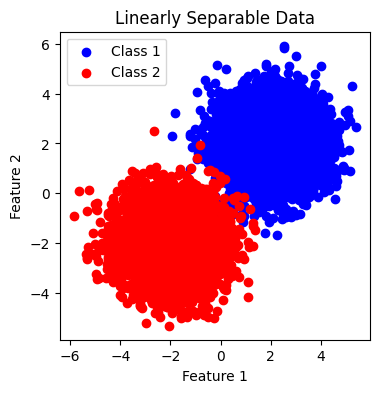

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mean1 = [2, 2]
mean2 = [-2, -2]
cov = [[1, 0], [0, 1]]

data_class1 = np.random.multivariate_normal(mean1, cov, 5000).astype(np.float32)
data_class2 = np.random.multivariate_normal(mean2, cov, 5000).astype(np.float32)

data = np.vstack((data_class1, data_class2)).astype(np.float32)
labels = np.hstack((np.ones(5000), -np.ones(5000))).astype(np.float32)

plt.figure(figsize=(4, 4))
plt.scatter(data_class1[:, 0], data_class1[:, 1], color='blue', label='Class 1')
plt.scatter(data_class2[:, 0], data_class2[:, 1], color='red', label='Class 2')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [11]:
data

array([[ 2.496714  ,  1.8617357 ],
       [ 2.6476886 ,  3.5230298 ],
       [ 1.7658466 ,  1.7658631 ],
       ...,
       [-1.0474095 , -1.6121726 ],
       [-0.6226334 , -1.621646  ],
       [-0.28647026, -3.6199198 ]], dtype=float32)

# 2.

## Perceptron Neural Unit

In [12]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features).astype(np.float32)
        self.bias = 0.0
        self.errors = []

        for _ in range(self.n_iters):
            error = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                error += int(update != 0.0)
            self.errors.append(error)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, -1)


## Adaline Neural Unit

In [13]:
class Adaline:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features).astype(np.float32)
        self.bias = 0.0
        self.costs = []

        for _ in range(self.n_iters):
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = linear_output
            errors = y - y_predicted
            self.weights += self.lr * np.dot(X.T, errors) / n_samples
            self.bias += self.lr * np.sum(errors) / n_samples
            cost = (errors**2).sum() / (2.0 * n_samples)
            self.costs.append(cost)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, -1)


# 3. 

# Training 

## splitting the dataset 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## training perceptron

In [15]:
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

## training adaline 

In [16]:
adaline = Adaline(learning_rate=0.01, n_iters=1000)
adaline.fit(X_train, y_train)
y_pred_adaline = adaline.predict(X_test)

## accuracy 

In [17]:
acc_perceptron = accuracy_score(y_test, y_pred_perceptron)
acc_adaline = accuracy_score(y_test, y_pred_adaline)

print(f"Perceptron Accuracy: {acc_perceptron}")
print(f"Adaline Accuracy: {acc_adaline}")

Perceptron Accuracy: 0.994
Adaline Accuracy: 0.9955


## Plotting

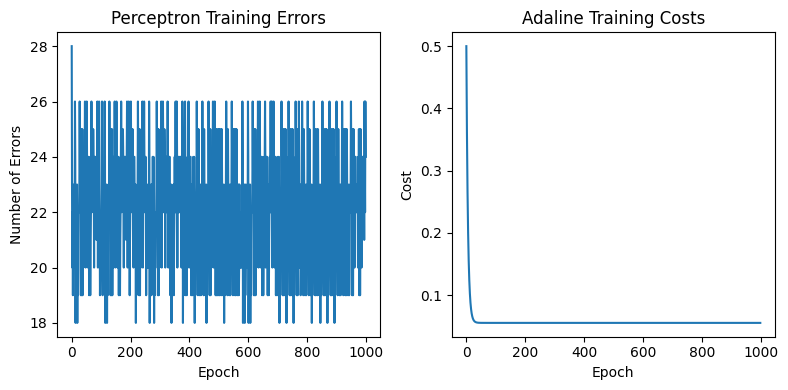

In [21]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(perceptron.errors)
plt.title('Perceptron Training Errors')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')

plt.subplot(1, 2, 2)
plt.plot(adaline.costs)
plt.title('Adaline Training Costs')
plt.xlabel('Epoch')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()
